<a href="https://colab.research.google.com/github/Nagasrineelamshetty/AIML-self-paced-learning-/blob/main/Keras_Sequential_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot

In [4]:
import numpy as np

In [6]:
!pip install livelossplot
import livelossplot
plot_losses= livelossplot.PlotLossesKeras()
%matplotlib inline
NUM_ROWS= 28
NUM_COLS=28
NUM_CLASSES= 10
BATCH_SIZE= 128
EPOCHS= 10

In [7]:
def data_summary(X_train, y_train, X_test, y_test):
    print('X_train shape: ', X_train.shape)
    print('y_train shape: ', y_train.shape)
    print('X_test shape: ', X_test.shape)
    print('y_test shape: ', y_test.shape)
    print('Train labels: ',y_train)
    print('Test labels: ',y_test)

In [9]:
(X_train, y_train),( X_test, y_test) = mnist.load_data()
data_summary(X_train, y_train, X_test, y_test)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)
Train labels:  [5 0 4 ... 5 6 8]
Test labels:  [7 2 1 ... 4 5 6]


In [10]:
X_train= X_train.reshape((X_train.shape[0],NUM_ROWS*NUM_COLS))
X_train= X_train.astype('float32')/255
X_test= X_test.reshape((X_test.shape[0],NUM_ROWS*NUM_COLS))
X_test= X_test.astype('float32')/255


In [12]:
y_train= to_categorical(y_train,NUM_CLASSES)
y_test= to_categorical(y_test,NUM_CLASSES)

In [13]:
data_summary(X_train, y_train, X_train, y_test)

X_train shape:  (60000, 784)
y_train shape:  (60000, 10)
X_test shape:  (60000, 784)
y_test shape:  (10000, 10)
Train labels:  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels:  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
model= models.Sequential()
model.add(Dense(512, activation='relu',input_shape=(NUM_ROWS*NUM_COLS,)))//1 st input layer so add input
model.add(Dropout(0.5))
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(NUM_CLASSES, activation= 'softmax'))//softmax -gives probabilities

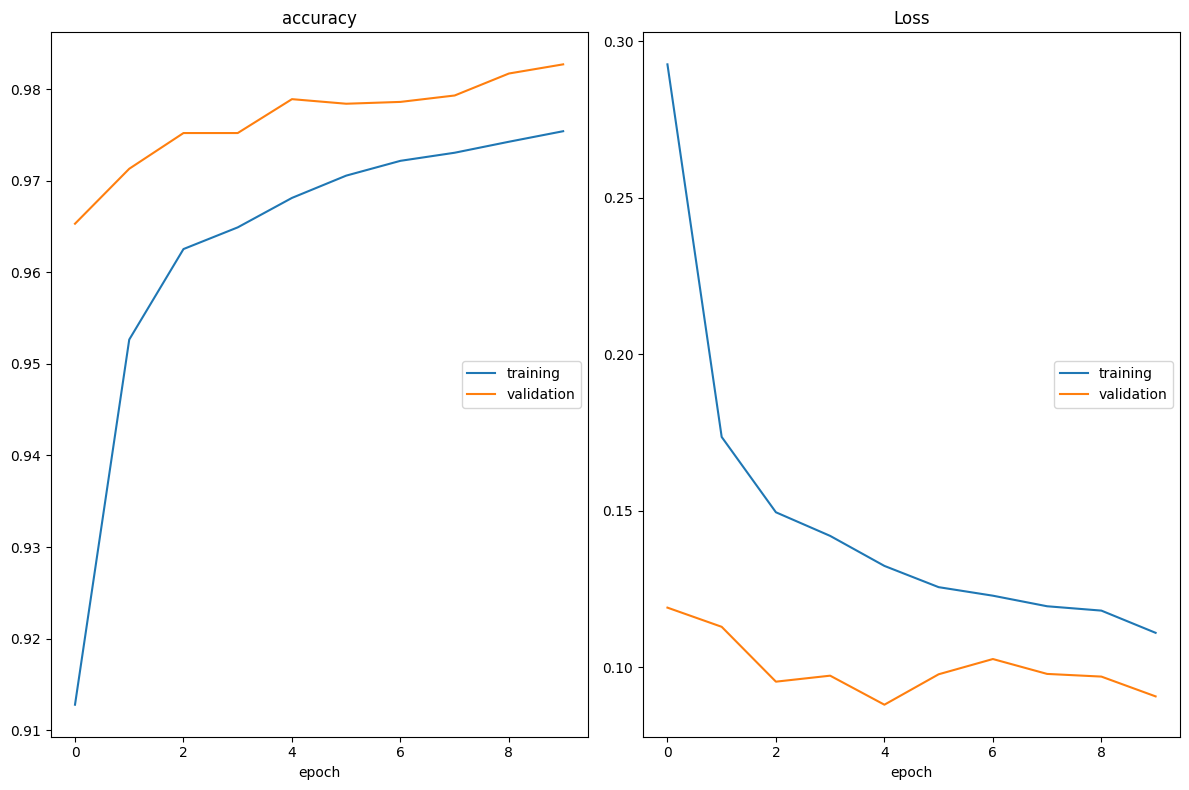

accuracy
	training         	 (min:    0.913, max:    0.975, cur:    0.975)
	validation       	 (min:    0.965, max:    0.983, cur:    0.983)
Loss
	training         	 (min:    0.111, max:    0.293, cur:    0.111)
	validation       	 (min:    0.088, max:    0.119, cur:    0.091)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9755 - loss: 0.1048 - val_accuracy: 0.9827 - val_loss: 0.0907
Test loss:  0.09069081395864487
Test accuracy:  0.982699990272522


In [16]:
#Compile Model
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
#Train model
model.fit(X_train, y_train, epochs= EPOCHS, callbacks= [plot_losses], verbose=1,validation_data=(X_test,y_test))
score= model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,071,638 (4.09 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 535,820 (2.04 MB)

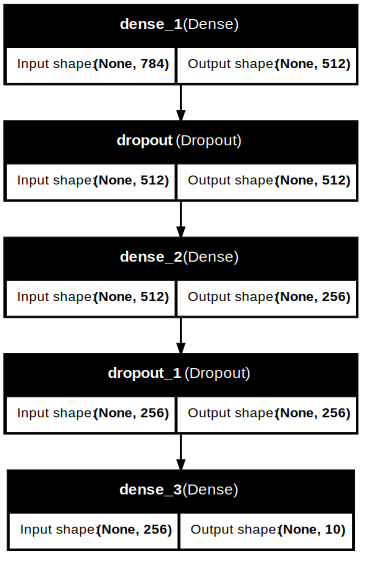

In [22]:
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True,
                 rankdir='TB',  # Try 'LR' for horizontal layout
                 dpi=70).create(prog='dot', format='svg'))